### * **What is a phishing attack?**
* Phishing is a type of social engineering attack often used to steal user data, including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, dupes a victim into opening an email, instant message, or text message. 

### * Phishing attack examples
* A spoofed email ostensibly from myuniversity.edu is mass-distributed to as many faculty members as possible. The email claims that the user’s password is about to expire. Instructions are given to go to myuniversity.edu/renewal to renew their password within 24 hours.>
<img src='https://github.com/taruntiwarihp/raw_images/blob/master/phishing-attack-email-example.png?raw=true'>

* Several things can occur by clicking the link. For example:

    1. The user is redirected to myuniversity.edurenewal.com, a bogus page appearing exactly like the real renewal page, where both new and existing passwords are requested. The attacker, monitoring the page, hijacks the original password to gain access to secured areas on the university network.
    
    2. The user is sent to the actual password renewal page. However, while being redirected, a malicious script activates in the background to hijack the user’s session cookie. This results in a reflected XSS attack, giving the perpetrator privileged access to the university network.

##### * Importing some useful libraries

In [11]:
import pandas as pd 
import numpy as np 

import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline 

import time 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from bs4 import BeautifulSoup
from selenium import webdriver
import networkx as nx

import pickle

import warnings 
warnings.filterwarnings('ignore')

* **Did some surfing and found some websites offering malicious links.** And found some datasets

In [12]:
phish_data=pd.read_csv("phishing_urls.csv")

In [13]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [14]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import re
import joblib

# Load the dataset with correct column names
phishing_data = pd.read_csv('phishing_urls.csv', encoding='latin1', on_bad_lines='skip')
phishing_data.columns = ['URL', 'Label']

# Check and adjust labels if necessary
for l in range(len(phishing_data.Label)):
    if phishing_data.Label[l] == '1.0':
        phishing_data.Label[l] = 'bad'
    elif phishing_data.Label[l] == '0.0':
        phishing_data.Label[l] = 'good'

# Function to extract features from URL
def extract_features(url):
    features = {}
    
    # URL length
    features['url_length'] = len(url)
    
    # Number of subdomains
    features['num_subdomains'] = url.count('.')
    
    # Presence of special characters
    features['has_https'] = int('https' in url)
    features['has_ip'] = int(bool(re.search(r'(\d{1,3}\.){3}\d{1,3}', url)))
    features['has_at'] = int('@' in url)
    features['has_redirect'] = int('//' in url[url.find('://')+3:])
    features['has_prefix_suffix'] = int('-' in url)
    features['has_top_level_domain'] = int(url.count('.') > 1)
    
    return features

# Create features from URLs
features_list = []
for url in phishing_data['URL']:
    features = extract_features(url)
    features_list.append(features)

features_df = pd.DataFrame(features_list)

# Define target variable
y = phishing_data['Label'].map({'good': 0, 'bad': 1})  # Map labels to 0 and 1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(model, 'phishing_model.pkl')

# Function to predict a single URL
def predict_url(url):
    features = extract_features(url)
    features_df = pd.DataFrame([features])
    prediction = model.predict(features_df)
    return 'Phishing' if prediction[0] == 1 else 'Legitimate'

# Load the model for future predictions
model = joblib.load('phishing_model.pkl')

# Example usage
example_url = 'http://example.com'
print(f'The URL "{example_url}" is predicted to be {predict_url(example_url)}.')


Accuracy: 0.7796534064707167
              precision    recall  f1-score   support

           0       0.77      0.98      0.86    118054
           1       0.85      0.27      0.41     46750

    accuracy                           0.78    164804
   macro avg       0.81      0.63      0.64    164804
weighted avg       0.79      0.78      0.74    164804

The URL "http://example.com" is predicted to be Legitimate.


In [15]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [16]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())

In [18]:
import seaborn as sns

In [21]:
import matplotlib.pyplot as plt

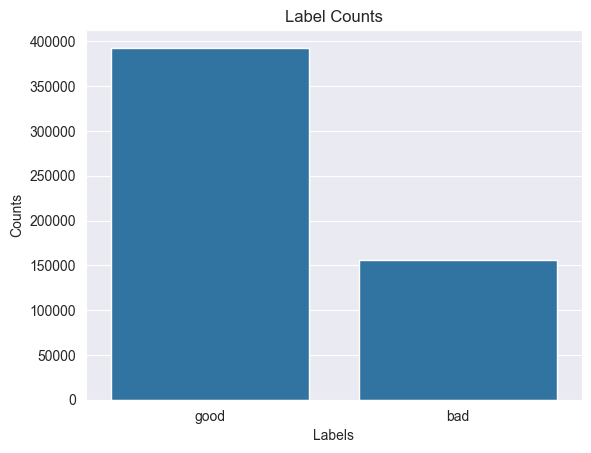

In [25]:
sns.set_style('darkgrid')
sns.barplot(x=label_counts.index, y=label_counts['Label'])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Counts')
plt.show()

In [26]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [27]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [28]:
tokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [29]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.587160600000061 sec


In [30]:
phish_data.sample(5)

,URL,Label,text_tokenized
289643,bchockey.net/news.aspx,good,"[bchockey, net, news, aspx]"
516023,kmalnnlecomcfddk.co /,bad,"[kmalnnlecomcfddk, co]"
275444,amazon.com/Hierarchical-Modelling-Environmenta...,good,"[amazon, com, Hierarchical, Modelling, Environ..."
428989,seatguru.com/,good,"[seatguru, com]"
200606,insightscoop.typepad.com/2004/2006/11/excommun...,good,"[insightscoop, typepad, com, excommunication, ..."


In [31]:
stemmer = SnowballStemmer("english")

In [32]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 42.9008705999986 sec


In [33]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
482553,aepohio.com/info/news/ViewRelease.aspx?release...,good,"[aepohio, com, info, news, ViewRelease, aspx, ...","[aepohio, com, info, news, viewreleas, aspx, r..."
226539,people.famouswhy.com/john_torrey/,good,"[people, famouswhy, com, john, torrey]","[peopl, famouswhi, com, john, torrey]"
88308,www.rrct.de/sdmanager/index.html,good,"[www, rrct, de, sdmanager, index, html]","[www, rrct, de, sdmanag, index, html]"
396296,mylife.com/c-685972845,good,"[mylife, com, c]","[mylif, com, c]"
519198,www.cetlot.com/wp-includes/pomo/idx.php?id=,bad,"[www, cetlot, com, wp, includes, pomo, idx, ph...","[www, cetlot, com, wp, includ, pomo, idx, php,..."


In [34]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.2721181000015349 sec


In [35]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
456657,usatoday.com/sports/hockey/checking/2006-12-17...,good,"[usatoday, com, sports, hockey, checking, jacq...","[usatoday, com, sport, hockey, check, jacqu, d...",usatoday com sport hockey check jacqu demer x htm
42886,master-web.net.ua/cache/aol/index.htm,bad,"[master, web, net, ua, cache, aol, index, htm]","[master, web, net, ua, cach, aol, index, htm]",master web net ua cach aol index htm
122096,manaderf.com/Support/71845/dir/log.php?cmd=_ac...,bad,"[manaderf, com, Support, dir, log, php, cmd, a...","[manaderf, com, support, dir, log, php, cmd, a...",manaderf com support dir log php cmd account d...
324005,evri.com/organization/hollywood-records-0x230ad,good,"[evri, com, organization, hollywood, records, ...","[evri, com, organ, hollywood, record, x, ad]",evri com organ hollywood record x ad
463750,whosdatedwho.com/tpx_1652/mark-philippoussis/,good,"[whosdatedwho, com, tpx, mark, philippoussis]","[whosdatedwho, com, tpx, mark, philippoussi]",whosdatedwho com tpx mark philippoussi


In [36]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [37]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [38]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [39]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [40]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

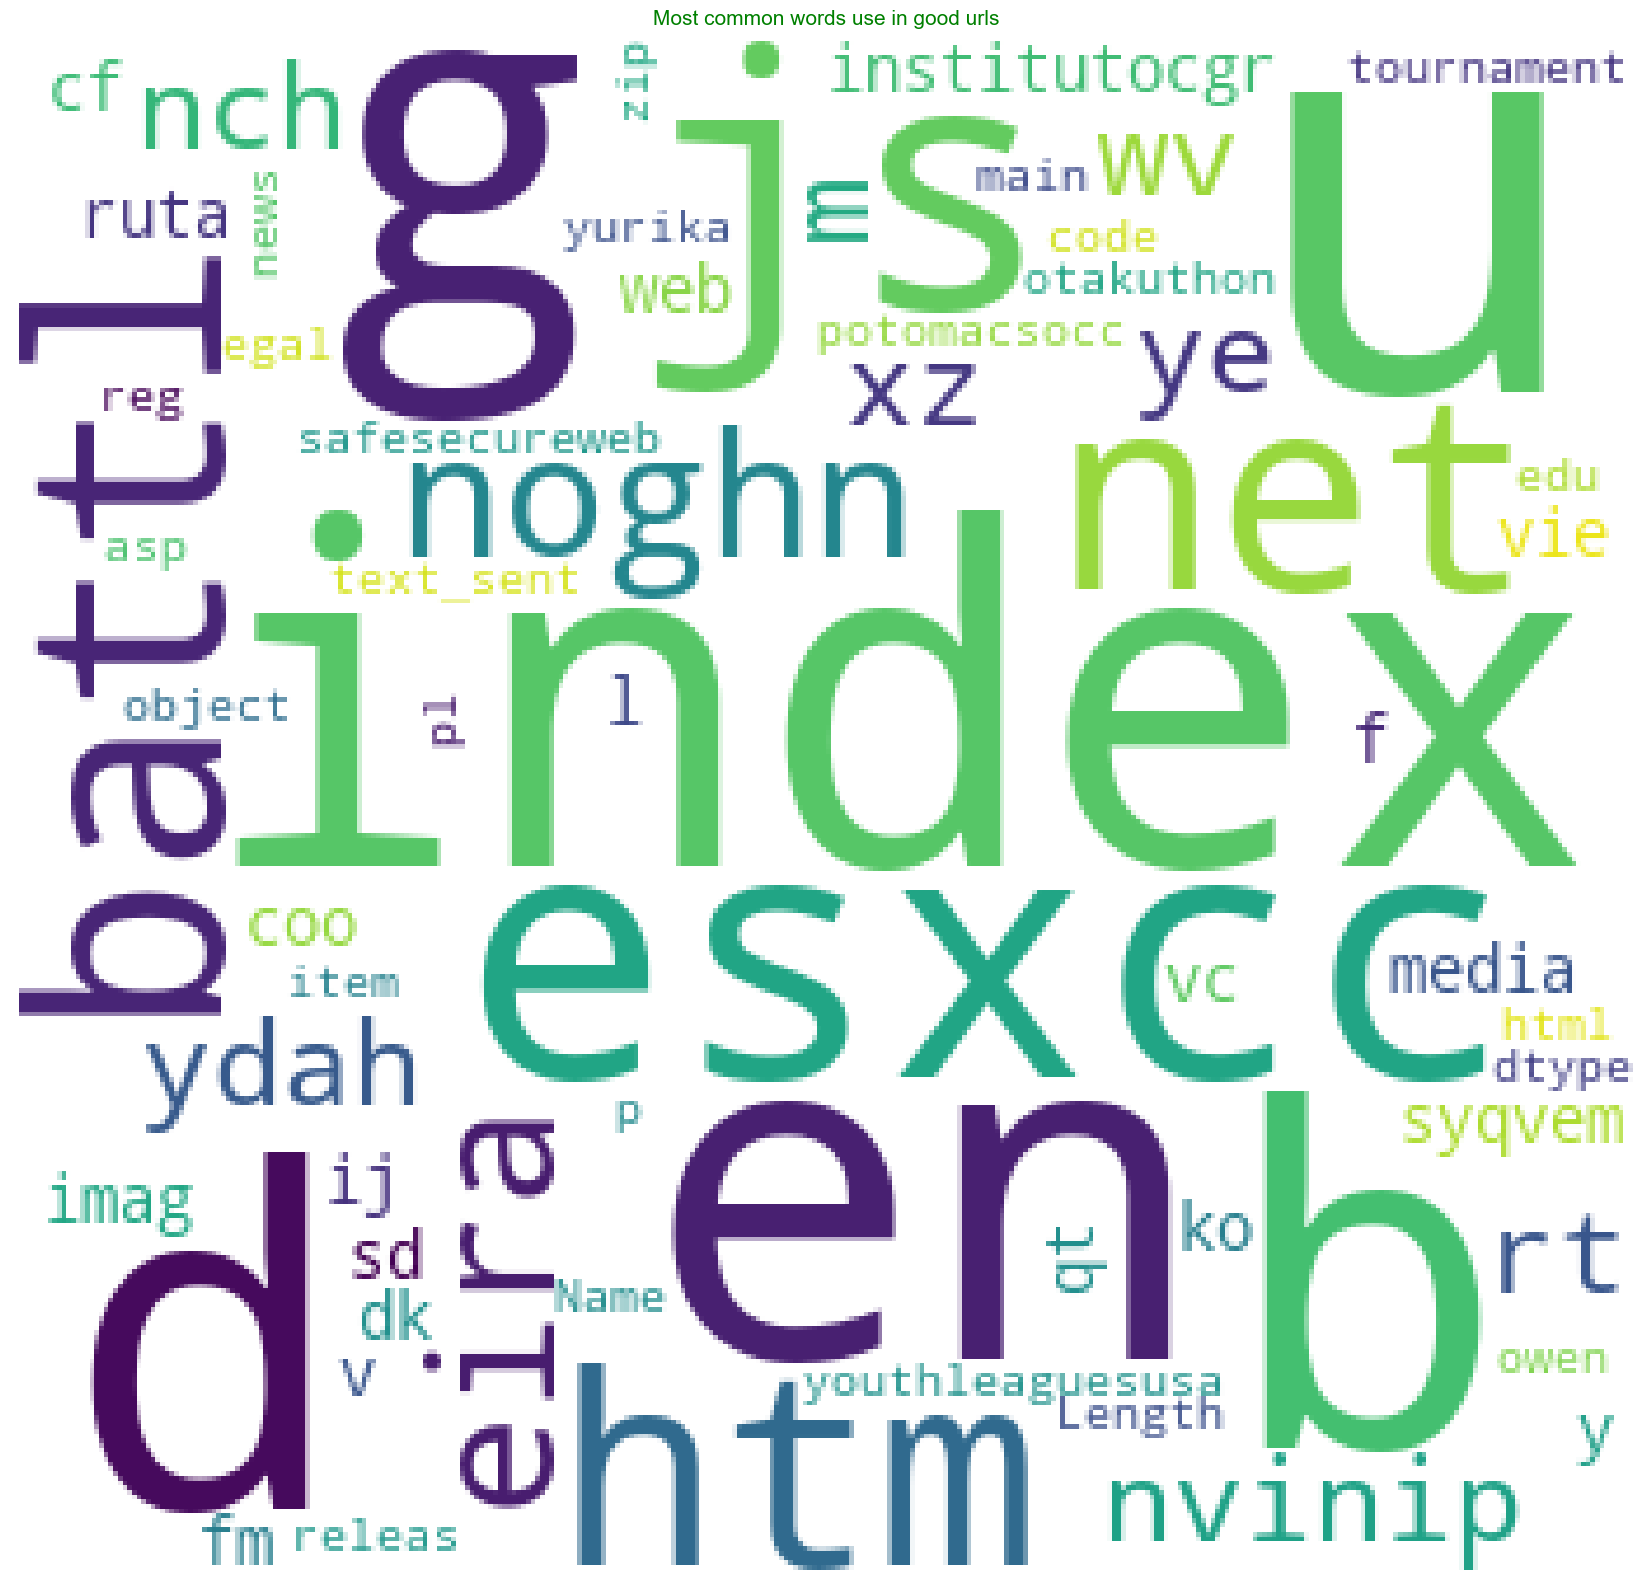

In [42]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [44]:
cv = CountVectorizer()

In [45]:
feature = cv.fit_transform(phish_data.text_sent)

In [46]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [48]:
lr = LogisticRegression()

In [49]:
lr.fit(trainX,trainY)

LogisticRegression()

In [50]:
lr.score(testX,testY)

0.965202385373206

In [51]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9796533570868597
Testing Accuracy : 0.965202385373206

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36746
        Good       0.99      0.96      0.98    100591

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

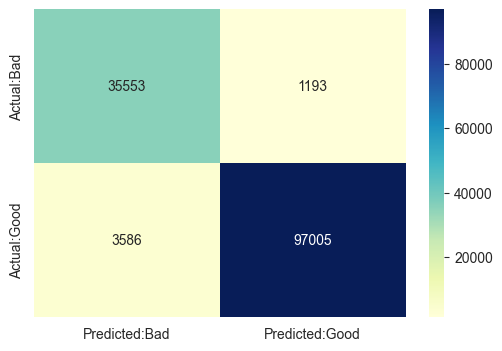

In [52]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [55]:
mnb = MultinomialNB()

In [56]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [57]:
mnb.score(testX,testY)

0.9576588974566212

In [58]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9741122159952816
Testing Accuracy : 0.9576588974566212

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.92     38180
        Good       0.98      0.97      0.97     99157

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

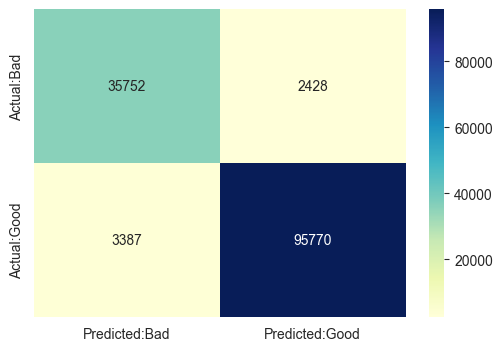

In [59]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

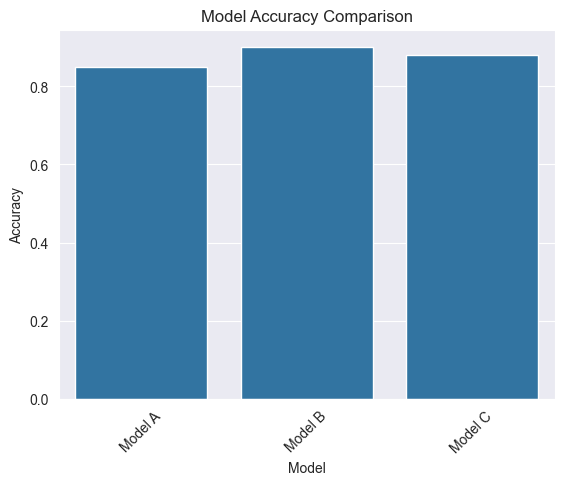

In [61]:
Scores_ml = {
    'Model A': 0.85,
    'Model B': 0.90,
    'Model C': 0.88
}

# Convert the dictionary to a DataFrame
acc = pd.DataFrame.from_dict(Scores_ml, orient='index', columns=['Accuracy'])

# Plot using seaborn's barplot with keyword arguments for x and y
sns.set_style('darkgrid')
sns.barplot(x=acc.index, y=acc.Accuracy)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.show()

In [62]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [63]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [64]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [65]:
pipeline_ls.score(testX,testY) 

0.9661562434012684

Training Accuracy : 0.9806509081112306
Testing Accuracy : 0.9661562434012684

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36821
        Good       0.99      0.97      0.98    100516

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

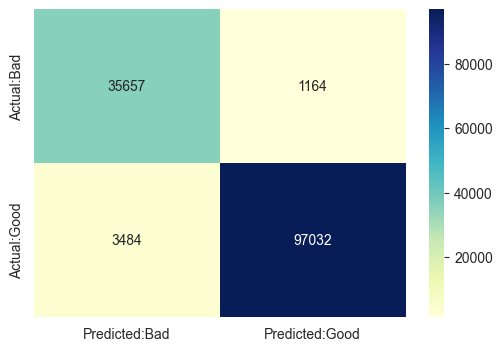

In [66]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [67]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [68]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9661562434012684


In [70]:
# Define categories of URLs
# Bad links: These are phishing sites
# Good links: These are not phishing sites

# List of URLs
urls = [
    "yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php",
    "fazan-pacir.rs/temp/libraries/ipad",
    "www.tubemoviez.exe",
    "svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt",
    "www.youtube.com/",
    "youtube.com/watch?v=qI0TQJI3vdU",
    "www.retailhellunderground.com/",
    "restorevisioncenters.com/html/technology.html"
]

# Corresponding categories for each URL
categories = [
    "Bad links",  # Phishing sites
    "Bad links",  # Phishing sites
    "Bad links",  # Phishing sites
    "Bad links",  # Phishing sites
    "Good links", # Not phishing sites
    "Good links", # Not phishing sites
    "Good links", # Not phishing sites
    "Good links"  # Not phishing sites
]

# Now you can proceed with processing the URLs and their categories.


In [71]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']


* **About dataset**
* Data is containg 5,49,346 unique entries.
* There are two columns.
* Label column is prediction col which has 2 categories 
    A. Good - which means the urls is not containing malicious stuff and **this site is not a Phishing Site.**
    B. Bad - which means the urls contains malicious stuffs and **this site isa Phishing Site.**
* There is no missing value in the dataset.

* **Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form